In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, regularizers


In [18]:
import tensorflow as tf

train_data_dir = "D:\\1-  (Graduatoin Project)\\F4 Gait recognation\\1- Data\\train\\Final data(69)"

# Specify the number of classes (replace 69 with your actual number of classes)


# Use 'categorical' for label_mode to get categorical labels
GEI_Train = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    seed=42,
    label_mode='categorical'  # Set label_mode to 'categorical'
    
)



Found 11389 files belonging to 69 classes.


In [19]:
GEI_Train = GEI_Train.map(lambda x,y: (x/255, y))

In [20]:
train_size = int(len(GEI_Train)*.8)
val_size = int(len(GEI_Train)*.1)
test_size = int(len(GEI_Train)*.1)

In [21]:
train_size = int(len(GEI_Train)*.8)
val_size = int(len(GEI_Train)*.1)
test_size = int(len(GEI_Train)*.1)

In [22]:
train = GEI_Train.take(train_size)
val = GEI_Train.skip(train_size).take(val_size)
test = GEI_Train.skip(train_size+val_size).take(test_size)

In [23]:
model = Sequential()
# first layer
model.add(Conv2D(16,(3,3),strides=(1, 1), padding='same' ,activation='LeakyReLU', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
# second layer
model.add(Conv2D(32,(3,3),strides=(1, 1), padding='same' ,activation='LeakyReLU'))
model.add(MaxPooling2D())
# third layer
model.add(Conv2D(16,(3,3),strides= (1,1),padding = 'same',activation= 'LeakyReLU'))
model.add(MaxPooling2D())
# the flatten layer
model.add(Flatten())

# fully connected layers  
model.add(Dense(256, activation = 'relu'))
model.add(Dense(69, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 16)       

In [24]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 1, mode = 'min', restore_best_weights = True)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [25]:
history = model.fit(
    train,
    epochs=6,  # Adjust the number of epochs as needed
    validation_data=val
)

Epoch 1/6


284/284 [==============================] - 154s 532ms/step - loss: 3.6590 - accuracy: 0.1247 - val_loss: 2.1165 - val_accuracy: 0.4330
Epoch 2/6
284/284 [==============================] - 155s 544ms/step - loss: 1.1737 - accuracy: 0.6739 - val_loss: 0.6358 - val_accuracy: 0.8125
Epoch 3/6
284/284 [==============================] - 152s 533ms/step - loss: 0.3486 - accuracy: 0.8959 - val_loss: 0.4094 - val_accuracy: 0.8848
Epoch 4/6
284/284 [==============================] - 151s 530ms/step - loss: 0.1614 - accuracy: 0.9507 - val_loss: 0.3454 - val_accuracy: 0.9089
Epoch 5/6
284/284 [==============================] - 150s 528ms/step - loss: 0.1153 - accuracy: 0.9658 - val_loss: 0.1288 - val_accuracy: 0.9625
Epoch 6/6
284/284 [==============================] - 151s 530ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 0.1826 - val_accuracy: 0.9571


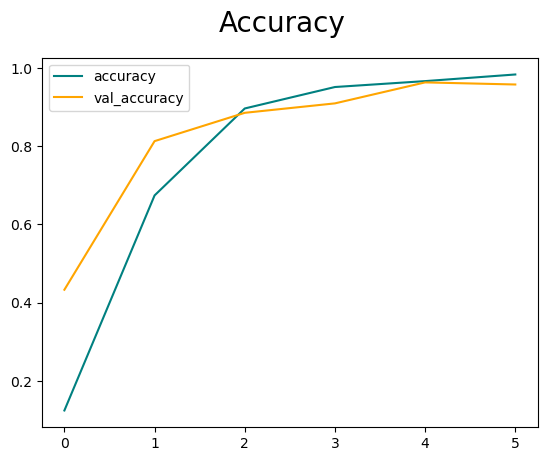

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

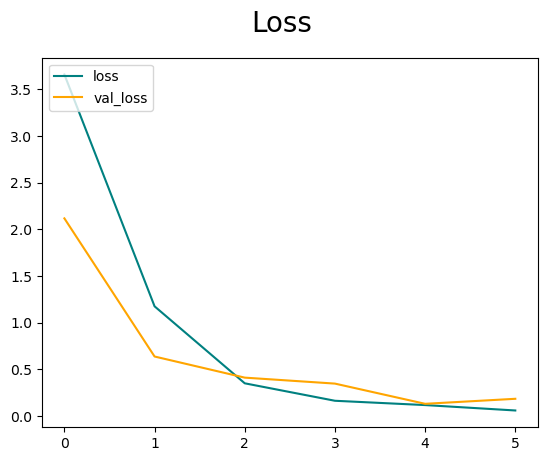

In [27]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(test)
print('Accuracy on test dataset:', test_accuracy)

35/35 [==============================] - 12s 139ms/step - loss: 0.1773 - accuracy: 0.9607
Accuracy on test dataset: 0.9607142806053162


In [29]:
import tensorflow as tf
import cv2
import numpy as np 
from matplotlib import pyplot as plt

# Prepare your new data for prediction (replace with your actual data loading and preprocessing)
new_data = cv2.imread('D:\\1-  (Graduatoin Project)\\F4 Gait recognation\\1- Data\\test\\Test Deeplabv3(69)\\010\\test9.jpg')

# Resize the new data to match the expected input shape (256x256)
resized_data = tf.image.resize(new_data, (256, 256))

# Normalize the data if needed (dividing by 255 as in your example)
resized_data_normalized = resized_data / 255.0

# Make predictions
yhat = model.predict(np.expand_dims(resized_data_normalized, 0))


# For classification problems, you might want to get the class with the highest probability
predicted_classes = np.argmax(yhat, axis=1)[0]

# Print or use the predictions as needed
print("Predicted Classes:", predicted_classes)


1/1 [==============================] - 1s 696ms/step
Predicted Classes: 9


In [30]:
model.save('D:\\1-  (Graduatoin Project)\\F4 Gait recognation\\2- Models\\Models on final (69)\\Model_2(98,96).h5')

c:\Users\iT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
